In [ ]:
# Importing necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

In [ ]:
tf.random.set_seed(32)
# Set a seed for reproducibility

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Load MNIST dataset

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Vamos visualizar os dados:

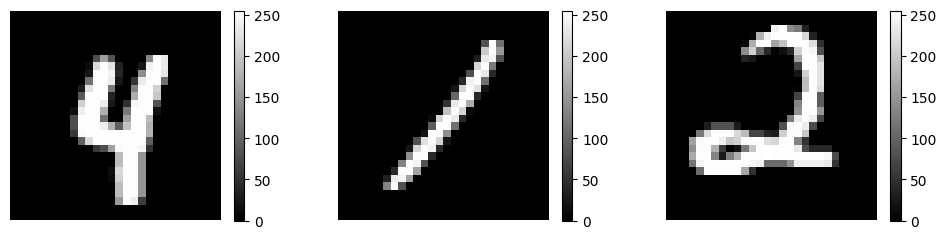

In [ ]:
num_samples = 3

# Select random indices for the samples
sample_indices = np.random.choice(x_train.shape[0], num_samples, replace=False)

plt.figure(figsize=(12, 6))

for i, idx in enumerate(sample_indices):
    # Normalized image
    plt.subplot(2, num_samples, i + 1 + num_samples)
    plt.imshow(x_train[idx], cmap="gray")
    plt.colorbar()
    plt.axis("off")

### Agora vamos normalizar os dados e visualizá-los novamente:

In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
# Normalize the data

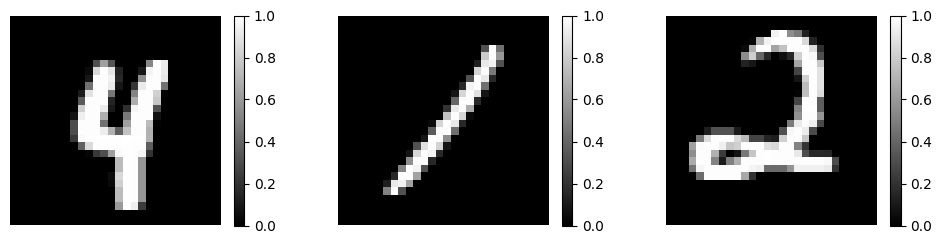

In [ ]:
plt.figure(figsize=(12, 6))
for i, idx in enumerate(sample_indices):
    # Normalized image
    plt.subplot(2, num_samples, i + 1 + num_samples)
    plt.imshow(x_train[idx], cmap="gray")
    plt.colorbar()
    plt.axis("off")

### Eles parecem exatamente iguais, mas observe a barra ao lado de cada imagem.

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
# Convert labels to one-hot encoding

In [ ]:
# Define a function to create a model
def create_model(use_l2=False, optimizer="adam"):
    regularizer = l2(1e-3) if use_l2 else None
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation="relu", kernel_regularizer=regularizer),
        Dense(64, activation="relu", kernel_regularizer=regularizer),
        Dense(32, activation="relu", kernel_regularizer=regularizer),
        Dense(10, activation="softmax")
    ])
    model.compile(
        optimizer=optimizer,
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [ ]:
# Train models with and without L2 regularization
def train_and_evaluate(optimizer, use_l2):
    model = create_model(use_l2=use_l2, optimizer=optimizer)
    history = model.fit(
        x_train, y_train,
        validation_split=0.2,
        epochs=4,  # Short training time for demonstration
        batch_size=32,
        verbose=0
    )
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    return history, test_loss, test_acc

In [ ]:
# Experiment setup
results = {}
for optimizer_name in ["SGD", "Adam"]:
    for use_l2 in [False, True]:
        key = f"{optimizer_name}_L2_{'ON' if use_l2 else 'OFF'}"
        print(f"Training model: {key}...")
        optimizer = SGD() if optimizer_name == "SGD" else Adam()
        history, test_loss, test_acc = train_and_evaluate(optimizer, use_l2)
        results[key] = {
            "history": history,
            "test_loss": test_loss,
            "test_acc": test_acc
        }
        print(f"Done. Test Accuracy: {test_acc:.4f}")


Training model: SGD_L2_OFF...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Done. Test Accuracy: 0.9491
Training model: SGD_L2_ON...
Done. Test Accuracy: 0.9490
Training model: Adam_L2_OFF...
Done. Test Accuracy: 0.9657
Training model: Adam_L2_ON...
Done. Test Accuracy: 0.9615


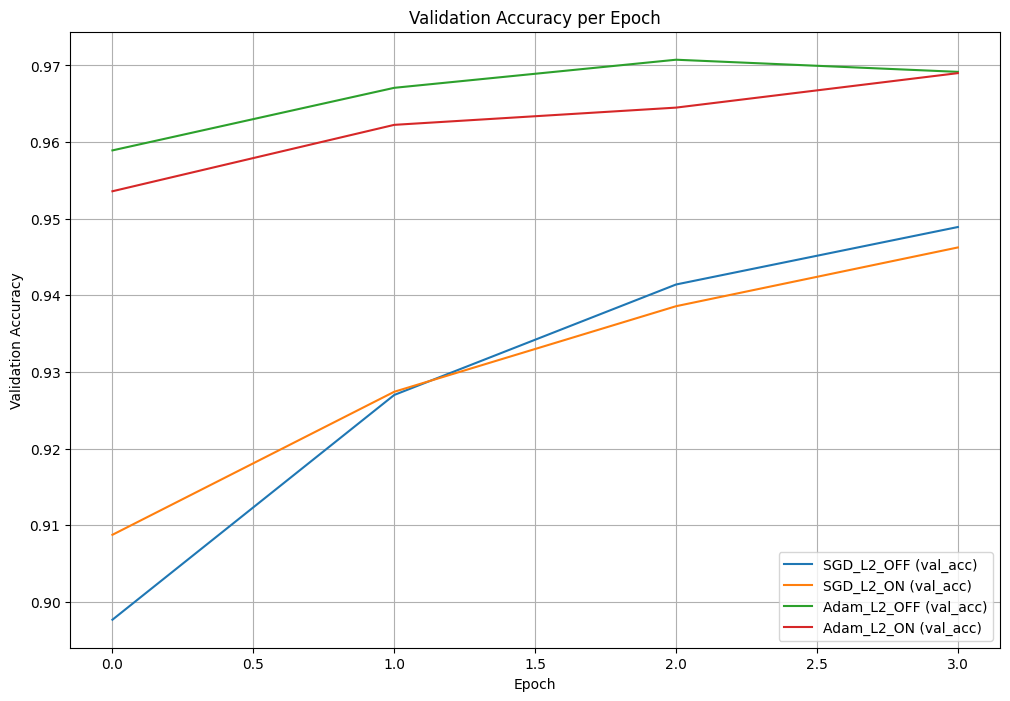

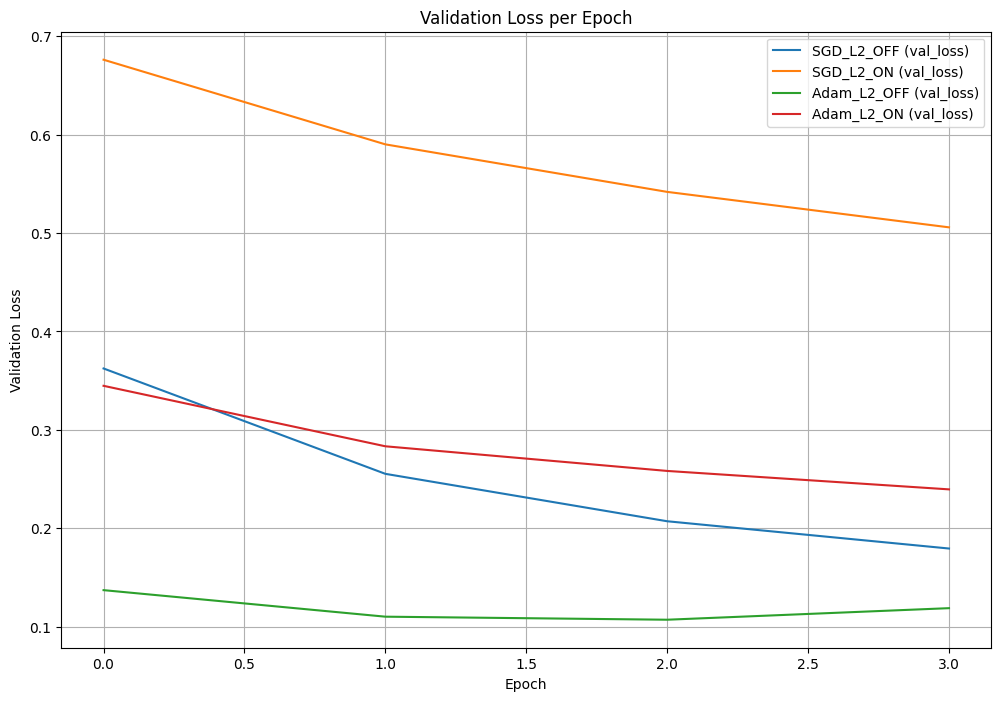

In [ ]:
# Visualization of results
def plot_results(results):
    plt.figure(figsize=(12, 8))
    for key, data in results.items():
        history = data["history"]
        plt.plot(history.history['val_accuracy'], label=f"{key} (val_acc)")
    plt.title("Validation Accuracy per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Validation Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(12, 8))
    for key, data in results.items():
        history = data["history"]
        plt.plot(history.history['val_loss'], label=f"{key} (val_loss)")
    plt.title("Validation Loss per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Validation Loss")
    plt.legend()
    plt.grid()
    plt.show()

# Plot the results
plot_results(results)
